In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
training_set = 'training_set'
val_set = 'val_set'
classes = [element.rstrip() for element in open('classes.txt', 'r').readlines()]

In [3]:
def read_files(links):
    labels = []
    
    for link in links:
        lines = open(link, 'r').readlines()
        
        for line in lines:
            values = line.split(' ')
            
            labels.append([
                classes[int(values[0])],
                float(values[1]),
                float(values[2]),
                float(values[3]),
                float(values[4])
            ])
    
    labels = np.array(labels)
    
    return pd.DataFrame({
        'class': labels[:, 0],
        'x': labels[:, 1],
        'y': labels[:, 2],
        'w': labels[:, 3],
        'h': labels[:, 4],
    })

In [18]:
training_labels = read_files(glob.glob('{}/*.txt'.format(training_set)))
val_labels = read_files(glob.glob('{}/*.txt'.format(val_set)))

In [19]:
total_labels = pd.concat([training_labels, val_labels])

In [20]:
def visualize(labels):
    size = labels.groupby('class').size()
    classes = size.index.tolist()
    total = size.values.tolist()
    
    plt.bar(classes, total)
    plt.tick_params(labelsize=15)
    plt.show()
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.pie(total, labels=classes, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 15})
    plt.show()
    # read all files
    # plot piechart + barchart

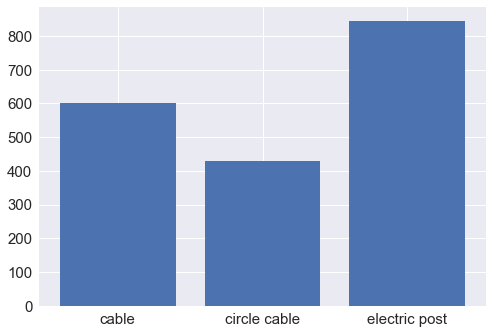

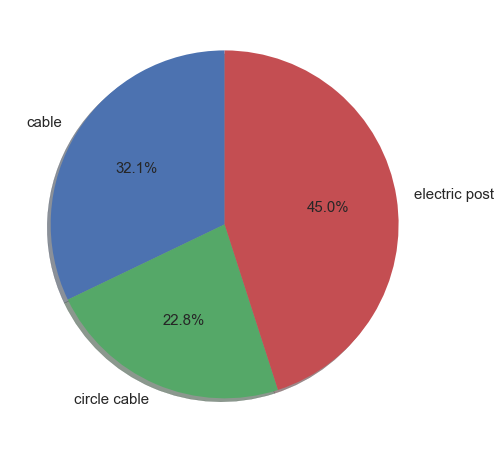

In [21]:
visualize(total_labels)

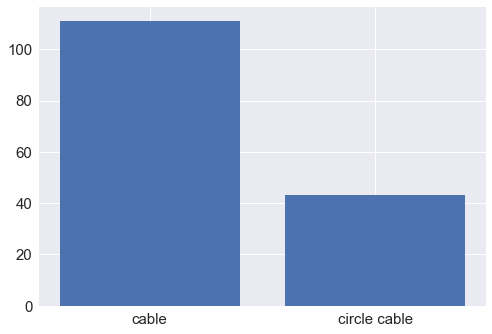

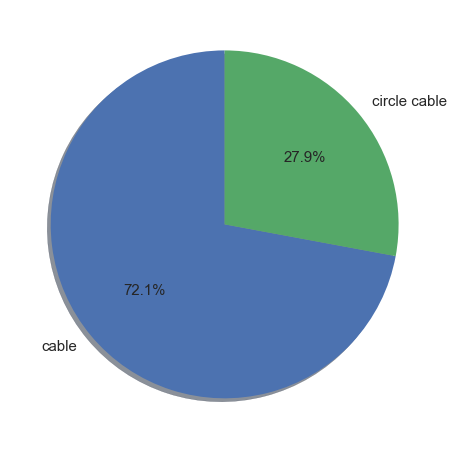

In [17]:
new_labels = read_files(glob.glob('{}/*.txt'.format('data/GH010935_1597626404510_A')))
visualize(new_labels)

In [12]:
glob.glob('{}/*.txt'.format('data/GH010935_1597626404510'))

[]